# 01. Introduction

* **Objective**
  * Preparing training and validation set for autogluon
  * Running and evaluation
  * Understanding the results
  * Using chemical descriptors as features

---
* **Datasets Overview**
  * `./input_data/final_data_last.csv`: *drug response data file*
    * COSMIC.ID  + pubchem ID + response + FP  
---

In week 6 hands-on, we're going to implement:

| **Steps** | **Contents** |
| ----- | ----- |
| **1. Setting up the environment** | We are going to use autogluon package for tabular multimodal data|
| **2. Data preparation** | We'll start with data that we prepared (week4) and used (week5) previously|
| **3. Training model using autogluon** | We'll learn about how to train and evaluate tabular dataset using autogluon |
| **4. Result interpretation** |  How to read results what results you need |
| **5. Saving and loading trained model** | Learning how to load and inference saved model|
| **6. Optional: Modal trainig with descriptors** | Using chemical descriptors as features and training |
| **7. Optional: Creating advanced implementation** | Advanced archicture choice (class) for reproducibility and repeatibility  |
| **8. Homework** | Repeat the hands-on with full dataset, compare results between using chemical fingerprints as feature and descriptors as features|


## Step 1: Setting up the Environment
* **Importing Libraries**
  * `autogluon`: *AutoGluon is an open-source machine learning library developed by Amazon Web Services (AWS). It is designed to automate the process of training* ([link for autogluon library documentation](https://auto.gluon.ai/stable/index.html)) 
  * `pandas`: *data manipulation and analysis* ([link for pandas library documentation](https://pandas.pydata.org/docs/))
  * `sklearn`: *machine learning library to* ([link for scikit-learn library documentation](https://scikit-learn.org/stable/getting_started.html)) 
  * `rdkit`: *a package of chemoinfmartics tools* ([link for rdkit library documentation](https://rdkit.readthedocs.io/en/latest/))  
  * `pathlib`: *filesystem paths (no difference in OS, Windows, LINUX)* [link for pathlib library documentation](https://docs.python.org/3/library/pathlib.html)


In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
from rdkit.Chem import Descriptors
from rdkit import Chem
from pathlib import Path



In [2]:
import autogluon
import rdkit 
print(f"Autgluon version: {autogluon.core.__version__}")
print(f"RDKIT version: {rdkit.__version__}")

Autgluon version: 0.8.2
RDKIT version: 2023.03.3


* **Directories and files to be used for week hands-on**
  * data_root: location of data root folder we use for today's hands-on
  * checkpoint_dir: location where we want to save our trained models
  * data: file path to use today ("./input_data/final_data_last.csv)
---

In [26]:
data_root = Path("./input_data")
checkpoint_dir = Path("./checkpoints")
drug_response_file = data_root.joinpath("final_data_last.csv").as_posix()


# creating  checkpont_dir

if not checkpoint_dir.exists():
    checkpoint_dir.mkdir(parents=True, exist_ok=True)



## Step 2: Data preparation 

* **Getting drug response data that previously used in week4, week5 in autogluon TabularDataset frame**


In [5]:

# TabularDataset is a subclass of the pandas DataFrame, 
data = TabularDataset(drug_response_file)
data

,COSMIC.ID,pubchem,response,SMILES,mfp1,mfp2,mfp3,mfp4,mfp5,mfp6,...,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,946355,176870,1,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,0,0,0,0,0,0,...,-7.545656,-6.764878,-23.421001,4.262074,0.894672,-21.070759,-9.718858,-9.275208,4.239239,15.535405
1,909976,176870,0,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,0,0,0,0,0,0,...,-2.691791,54.276461,13.800674,2.341313,10.846211,1.339995,13.956762,7.240017,6.817201,-17.031975
2,909703,176870,0,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,0,0,0,0,0,0,...,58.929391,92.393231,27.658675,35.567586,-19.922163,-34.336671,16.098436,-6.076940,-4.004105,40.331321
3,930082,176870,0,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,0,0,0,0,0,0,...,3.926118,-15.733750,-22.814780,-21.560789,3.949669,2.040542,-25.266388,0.735639,7.785043,7.379356
4,910710,176870,0,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,0,0,0,0,0,0,...,8.238729,93.493738,12.789746,-8.483441,15.330031,-9.604577,-12.454324,-21.591765,-14.726605,-2.982769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163723,910904,51000408,0,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,0,0,0,0,0,0,...,43.383924,-19.902250,-10.580563,-7.385641,19.255702,-24.345189,-18.291537,8.914297,-27.728847,-6.398784
163724,1298539,51000408,0,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,0,0,0,0,0,0,...,-2.998219,-25.272331,38.586275,-7.853701,4.300292,-20.220975,-2.245990,-7.640973,-9.644362,-15.052248
163725,910930,51000408,1,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,0,0,0,0,0,0,...,124.585214,74.886710,-5.347811,65.279439,54.871992,8.164716,-1.536201,-22.600891,-4.417995,-21.171052
163726,724872,51000408,0,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,0,0,0,0,0,0,...,-61.233866,1.224507,-21.260389,37.901100,-6.907894,18.643257,8.471179,22.547462,-10.738198,-20.835576


In [6]:
type(data)

autogluon.core.dataset.TabularDataset

* **training data prepration**
  * creating data info  
  * removing the columns that are not used for training
---

In [7]:
col_names = ["COSMIC.ID", "pubchem", "SMILES"] 

data_info = data[col_names + ["response"]] # we will use this data later for STEP 6 for creating chemical descriptor 
data_for_train = data.drop(columns=["COSMIC.ID", "pubchem", "SMILES"])
data_for_train # we will use this data for training 

,response,mfp1,mfp2,mfp3,mfp4,mfp5,mfp6,mfp7,mfp8,mfp9,...,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,1,0,0,0,0,0,0,0,0,0,...,-7.545656,-6.764878,-23.421001,4.262074,0.894672,-21.070759,-9.718858,-9.275208,4.239239,15.535405
1,0,0,0,0,0,0,0,0,0,0,...,-2.691791,54.276461,13.800674,2.341313,10.846211,1.339995,13.956762,7.240017,6.817201,-17.031975
2,0,0,0,0,0,0,0,0,0,0,...,58.929391,92.393231,27.658675,35.567586,-19.922163,-34.336671,16.098436,-6.076940,-4.004105,40.331321
3,0,0,0,0,0,0,0,0,0,0,...,3.926118,-15.733750,-22.814780,-21.560789,3.949669,2.040542,-25.266388,0.735639,7.785043,7.379356
4,0,0,0,0,0,0,0,0,0,0,...,8.238729,93.493738,12.789746,-8.483441,15.330031,-9.604577,-12.454324,-21.591765,-14.726605,-2.982769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163723,0,0,0,0,0,0,0,0,0,0,...,43.383924,-19.902250,-10.580563,-7.385641,19.255702,-24.345189,-18.291537,8.914297,-27.728847,-6.398784
163724,0,0,0,0,0,0,0,0,0,0,...,-2.998219,-25.272331,38.586275,-7.853701,4.300292,-20.220975,-2.245990,-7.640973,-9.644362,-15.052248
163725,1,0,0,0,0,0,0,0,0,0,...,124.585214,74.886710,-5.347811,65.279439,54.871992,8.164716,-1.536201,-22.600891,-4.417995,-21.171052
163726,0,0,0,0,0,0,0,0,0,0,...,-61.233866,1.224507,-21.260389,37.901100,-6.907894,18.643257,8.471179,22.547462,-10.738198,-20.835576


In [8]:
data_info

,COSMIC.ID,pubchem,SMILES,response
0,946355,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,1
1,909976,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,0
2,909703,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,0
3,930082,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,0
4,910710,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,0
...,...,...,...,...
163723,910904,51000408,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,0
163724,1298539,51000408,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,0
163725,910930,51000408,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,1
163726,724872,51000408,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,0


In [9]:
data_for_train

,response,mfp1,mfp2,mfp3,mfp4,mfp5,mfp6,mfp7,mfp8,mfp9,...,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,1,0,0,0,0,0,0,0,0,0,...,-7.545656,-6.764878,-23.421001,4.262074,0.894672,-21.070759,-9.718858,-9.275208,4.239239,15.535405
1,0,0,0,0,0,0,0,0,0,0,...,-2.691791,54.276461,13.800674,2.341313,10.846211,1.339995,13.956762,7.240017,6.817201,-17.031975
2,0,0,0,0,0,0,0,0,0,0,...,58.929391,92.393231,27.658675,35.567586,-19.922163,-34.336671,16.098436,-6.076940,-4.004105,40.331321
3,0,0,0,0,0,0,0,0,0,0,...,3.926118,-15.733750,-22.814780,-21.560789,3.949669,2.040542,-25.266388,0.735639,7.785043,7.379356
4,0,0,0,0,0,0,0,0,0,0,...,8.238729,93.493738,12.789746,-8.483441,15.330031,-9.604577,-12.454324,-21.591765,-14.726605,-2.982769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163723,0,0,0,0,0,0,0,0,0,0,...,43.383924,-19.902250,-10.580563,-7.385641,19.255702,-24.345189,-18.291537,8.914297,-27.728847,-6.398784
163724,0,0,0,0,0,0,0,0,0,0,...,-2.998219,-25.272331,38.586275,-7.853701,4.300292,-20.220975,-2.245990,-7.640973,-9.644362,-15.052248
163725,1,0,0,0,0,0,0,0,0,0,...,124.585214,74.886710,-5.347811,65.279439,54.871992,8.164716,-1.536201,-22.600891,-4.417995,-21.171052
163726,0,0,0,0,0,0,0,0,0,0,...,-61.233866,1.224507,-21.260389,37.901100,-6.907894,18.643257,8.471179,22.547462,-10.738198,-20.835576


* **data filtering**
  * removing columns low variance (10%)
  * scale data (we do not want our model deal with big numbers)
---

In [10]:
data_for_train

,response,mfp1,mfp2,mfp3,mfp4,mfp5,mfp6,mfp7,mfp8,mfp9,...,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,1,0,0,0,0,0,0,0,0,0,...,-7.545656,-6.764878,-23.421001,4.262074,0.894672,-21.070759,-9.718858,-9.275208,4.239239,15.535405
1,0,0,0,0,0,0,0,0,0,0,...,-2.691791,54.276461,13.800674,2.341313,10.846211,1.339995,13.956762,7.240017,6.817201,-17.031975
2,0,0,0,0,0,0,0,0,0,0,...,58.929391,92.393231,27.658675,35.567586,-19.922163,-34.336671,16.098436,-6.076940,-4.004105,40.331321
3,0,0,0,0,0,0,0,0,0,0,...,3.926118,-15.733750,-22.814780,-21.560789,3.949669,2.040542,-25.266388,0.735639,7.785043,7.379356
4,0,0,0,0,0,0,0,0,0,0,...,8.238729,93.493738,12.789746,-8.483441,15.330031,-9.604577,-12.454324,-21.591765,-14.726605,-2.982769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163723,0,0,0,0,0,0,0,0,0,0,...,43.383924,-19.902250,-10.580563,-7.385641,19.255702,-24.345189,-18.291537,8.914297,-27.728847,-6.398784
163724,0,0,0,0,0,0,0,0,0,0,...,-2.998219,-25.272331,38.586275,-7.853701,4.300292,-20.220975,-2.245990,-7.640973,-9.644362,-15.052248
163725,1,0,0,0,0,0,0,0,0,0,...,124.585214,74.886710,-5.347811,65.279439,54.871992,8.164716,-1.536201,-22.600891,-4.417995,-21.171052
163726,0,0,0,0,0,0,0,0,0,0,...,-61.233866,1.224507,-21.260389,37.901100,-6.907894,18.643257,8.471179,22.547462,-10.738198,-20.835576


In [13]:
from sklearn.feature_selection import VarianceThreshold

# Separate the response column
response = data_for_train['response']

filter_df= data_for_train.drop('response', axis=1)


In [14]:
filter_df

,mfp1,mfp2,mfp3,mfp4,mfp5,mfp6,mfp7,mfp8,mfp9,mfp10,...,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0,0,0,0,0,0,0,0,0,0,...,-7.545656,-6.764878,-23.421001,4.262074,0.894672,-21.070759,-9.718858,-9.275208,4.239239,15.535405
1,0,0,0,0,0,0,0,0,0,0,...,-2.691791,54.276461,13.800674,2.341313,10.846211,1.339995,13.956762,7.240017,6.817201,-17.031975
2,0,0,0,0,0,0,0,0,0,0,...,58.929391,92.393231,27.658675,35.567586,-19.922163,-34.336671,16.098436,-6.076940,-4.004105,40.331321
3,0,0,0,0,0,0,0,0,0,0,...,3.926118,-15.733750,-22.814780,-21.560789,3.949669,2.040542,-25.266388,0.735639,7.785043,7.379356
4,0,0,0,0,0,0,0,0,0,0,...,8.238729,93.493738,12.789746,-8.483441,15.330031,-9.604577,-12.454324,-21.591765,-14.726605,-2.982769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163723,0,0,0,0,0,0,0,0,0,0,...,43.383924,-19.902250,-10.580563,-7.385641,19.255702,-24.345189,-18.291537,8.914297,-27.728847,-6.398784
163724,0,0,0,0,0,0,0,0,0,0,...,-2.998219,-25.272331,38.586275,-7.853701,4.300292,-20.220975,-2.245990,-7.640973,-9.644362,-15.052248
163725,0,0,0,0,0,0,0,0,0,0,...,124.585214,74.886710,-5.347811,65.279439,54.871992,8.164716,-1.536201,-22.600891,-4.417995,-21.171052
163726,0,0,0,0,0,0,0,0,0,0,...,-61.233866,1.224507,-21.260389,37.901100,-6.907894,18.643257,8.471179,22.547462,-10.738198,-20.835576


In [15]:
# Initialize the transformer with a threshold of 10 percent, at home try difference options for 0.01, 0.05 and observe how fingerprint and pc changes
selector = VarianceThreshold(threshold=0.1)

# Fit the transformer and transform the data
filtered_data = selector.fit_transform(filter_df)
# Get the columns that were kept
kept_columns = filter_df.columns[selector.get_support(indices=True)]

df_filtered = pd.DataFrame(filtered_data, columns=kept_columns)

# Add back the response column
df_filtered['response'] = response
df_filtered

,mfp2,mfp5,mfp16,mfp34,mfp37,mfp46,mfp54,mfp65,mfp74,mfp75,...,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,response
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,-6.764878,-23.421001,4.262074,0.894672,-21.070759,-9.718858,-9.275208,4.239239,15.535405,1
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,54.276461,13.800674,2.341313,10.846211,1.339995,13.956762,7.240017,6.817201,-17.031975,0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,92.393231,27.658675,35.567586,-19.922163,-34.336671,16.098436,-6.076940,-4.004105,40.331321,0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,-15.733750,-22.814780,-21.560789,3.949669,2.040542,-25.266388,0.735639,7.785043,7.379356,0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,93.493738,12.789746,-8.483441,15.330031,-9.604577,-12.454324,-21.591765,-14.726605,-2.982769,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163723,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,-19.902250,-10.580563,-7.385641,19.255702,-24.345189,-18.291537,8.914297,-27.728847,-6.398784,0
163724,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,-25.272331,38.586275,-7.853701,4.300292,-20.220975,-2.245990,-7.640973,-9.644362,-15.052248,0
163725,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,74.886710,-5.347811,65.279439,54.871992,8.164716,-1.536201,-22.600891,-4.417995,-21.171052,1
163726,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.224507,-21.260389,37.901100,-6.907894,18.643257,8.471179,22.547462,-10.738198,-20.835576,0


In [16]:
df_filtered

,mfp2,mfp5,mfp16,mfp34,mfp37,mfp46,mfp54,mfp65,mfp74,mfp75,...,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,response
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,-6.764878,-23.421001,4.262074,0.894672,-21.070759,-9.718858,-9.275208,4.239239,15.535405,1
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,54.276461,13.800674,2.341313,10.846211,1.339995,13.956762,7.240017,6.817201,-17.031975,0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,92.393231,27.658675,35.567586,-19.922163,-34.336671,16.098436,-6.076940,-4.004105,40.331321,0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,-15.733750,-22.814780,-21.560789,3.949669,2.040542,-25.266388,0.735639,7.785043,7.379356,0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,93.493738,12.789746,-8.483441,15.330031,-9.604577,-12.454324,-21.591765,-14.726605,-2.982769,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163723,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,-19.902250,-10.580563,-7.385641,19.255702,-24.345189,-18.291537,8.914297,-27.728847,-6.398784,0
163724,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,-25.272331,38.586275,-7.853701,4.300292,-20.220975,-2.245990,-7.640973,-9.644362,-15.052248,0
163725,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,74.886710,-5.347811,65.279439,54.871992,8.164716,-1.536201,-22.600891,-4.417995,-21.171052,1
163726,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.224507,-21.260389,37.901100,-6.907894,18.643257,8.471179,22.547462,-10.738198,-20.835576,0


In [17]:
pc_columns = [col for col in df_filtered.columns if col.startswith("pc")]
pc_columns

['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10']

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaled_df = df_filtered.copy() # 
# Applying Min-Max scaling
scaler = MinMaxScaler()
scaled_df[pc_columns] = scaler.fit_transform(scaled_df[pc_columns])


In [19]:
scaled_df

,mfp2,mfp5,mfp16,mfp34,mfp37,mfp46,mfp54,mfp65,mfp74,mfp75,...,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,response
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.267479,0.302659,0.303619,0.488180,0.201252,0.289089,0.381514,0.466660,0.672287,1
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.634256,0.599264,0.293003,0.564066,0.390212,0.545488,0.571525,0.498250,0.297486,0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.863286,0.709693,0.476641,0.329440,0.089399,0.568682,0.418311,0.365646,0.957650,0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.213588,0.307490,0.160899,0.511476,0.396118,0.120714,0.496691,0.510110,0.578423,0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.869899,0.591208,0.233176,0.598257,0.297931,0.259465,0.239810,0.234253,0.459171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163723,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.188541,0.404979,0.239243,0.628193,0.173644,0.196249,0.590787,0.074924,0.419858,0
163724,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.156274,0.796771,0.236656,0.514150,0.208418,0.370017,0.400316,0.296531,0.320270,0
163725,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.758096,0.446677,0.640855,0.899787,0.447755,0.377704,0.228200,0.360575,0.249852,1
163726,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.315485,0.319876,0.489538,0.428681,0.536106,0.486081,0.747639,0.283127,0.253713,0


Text(0.5, 0, 'pc1 and pc2')

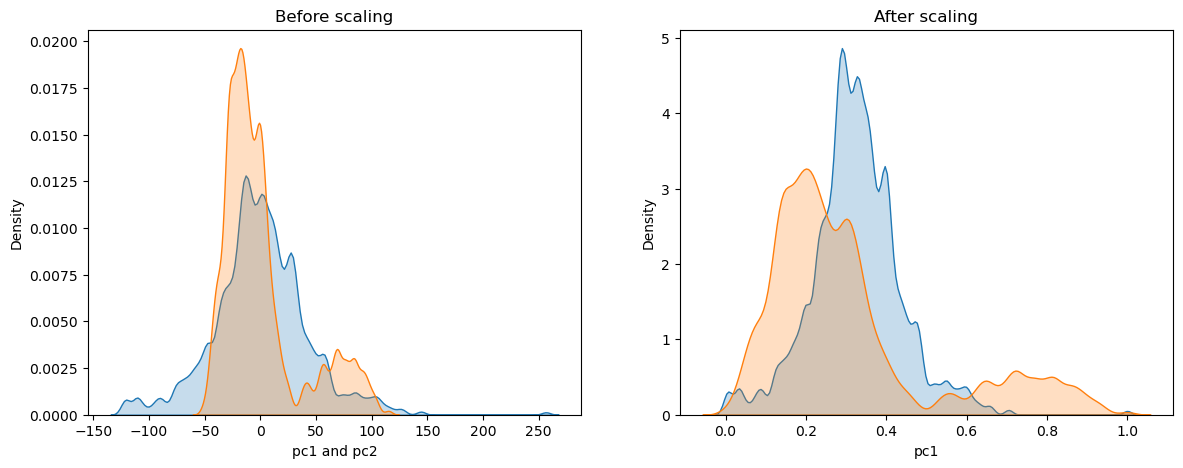

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 2,  figsize=(14, 5))


sns.kdeplot(df_filtered["pc1"], fill=True, ax=axes[0])
sns.kdeplot(df_filtered["pc2"], fill=True, ax=axes[0]).set(title='Before scaling')
axes[0].set_xlabel("pc1 and pc2") 

sns.kdeplot(scaled_df["pc1"], fill=True, ax=axes[1])
sns.kdeplot(scaled_df["pc2"], fill=True, ax=axes[1]).set(title="After scaling")
axes[0].set_xlabel("pc1 and pc2")  # Set x-axis title for the first subplot

* **data splitting**
  * train 80% 
  * test 20% 
---

In [22]:
from sklearn.model_selection import train_test_split
# splitting traing data into train and test
train, test = train_test_split(scaled_df, test_size=0.2, shuffle=True, random_state=43)

In [23]:
train

,mfp2,mfp5,mfp16,mfp34,mfp37,mfp46,mfp54,mfp65,mfp74,mfp75,...,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,response
26001,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.194344,0.778405,0.342495,0.615210,0.734406,0.658682,0.795203,0.163845,0.802498,0
112720,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.176725,0.446450,0.321420,0.621385,0.181431,0.218042,0.476008,0.320493,0.427401,0
123342,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.198956,0.778621,0.247745,0.375391,0.626011,0.472897,0.608918,0.217320,0.633253,1
73463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.177551,0.087776,0.306421,0.427060,0.340060,0.909876,0.662450,0.356215,0.543045,0
46916,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.132029,0.238507,0.087092,0.539896,0.231802,0.084960,0.680855,0.443543,0.566317,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129082,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.634256,0.599264,0.293003,0.564066,0.390212,0.545488,0.571525,0.498250,0.297486,0
125205,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.238102,0.462969,0.205437,0.176014,0.240665,0.267732,0.551488,0.396747,0.552321,0
40753,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.211093,0.463231,0.359152,0.486385,0.445184,0.186236,0.597493,0.593125,0.542430,0
150848,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.125308,0.766727,0.295223,0.708465,0.791324,0.659764,0.771333,0.193400,0.740712,0


In [24]:
test

,mfp2,mfp5,mfp16,mfp34,mfp37,mfp46,mfp54,mfp65,mfp74,mfp75,...,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,response
93892,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.057673,0.921294,0.185701,0.573326,0.258424,0.539920,0.562755,0.347307,0.422274,0
69487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.327610,0.498499,0.429676,0.681361,0.387883,0.222757,0.133801,0.564506,0.495678,0
44391,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.174117,0.185421,0.064128,0.635105,0.188368,0.348371,0.511663,0.404396,0.586082,0
97404,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.847747,0.621208,0.190155,0.785904,0.426247,0.356930,0.203240,0.001806,0.909548,1
12732,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.183126,0.792661,0.326143,0.525626,0.424478,0.225251,0.427848,0.334151,0.396003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.232042,0.422949,0.381328,0.518356,0.311270,0.263803,0.737061,0.291782,0.547446,0
117686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.610048,0.548068,0.224608,0.571577,0.414224,0.652758,1.000000,0.684225,0.526995,1
24964,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.183249,0.783407,0.315640,0.521907,0.784530,0.586815,0.782030,0.174695,0.733437,1
144658,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.062993,0.787020,0.234926,0.467457,0.151746,0.387215,0.378187,0.339700,0.399641,1


In [25]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130982 entries, 26001 to 14148
Columns: 128 entries, mfp2 to response
dtypes: float64(127), int64(1)
memory usage: 128.9 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32746 entries, 93892 to 110239
Columns: 128 entries, mfp2 to response
dtypes: float64(127), int64(1)
memory usage: 32.2 MB


(None, None)

## Step 3:Training model using autogluon

In [27]:
from pathlib import Path
import os

model_name = "week6_hands_on_scaled"

predictor = TabularPredictor(
    label="response",
    eval_metric="roc_auc",
    problem_type="binary",
    path=checkpoint_dir.joinpath(model_name)
)

In [28]:
predictor.fit(
    train,
)

	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "checkpoints/week6_hands_on_scaled/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #141-Ubuntu SMP Wed Aug 10 13:42:03 UTC 2022
Disk Space Avail:   7.31 GB / 1887.37 GB (0.4%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    130982
Train Data Columns: 127
Label Column: response
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    967318.69 MB
	Train Data (Original)  Memory Usage: 133.08 MB (0.0% of available memory)
	Inf

[1000]	valid_set's binary_logloss: 0.303958
[2000]	valid_set's binary_logloss: 0.295421
[3000]	valid_set's binary_logloss: 0.292576
[4000]	valid_set's binary_logloss: 0.292367


	0.9389	 = Validation score   (roc_auc)
	207.08s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's binary_logloss: 0.303959
[2000]	valid_set's binary_logloss: 0.295993
[3000]	valid_set's binary_logloss: 0.294082


	0.938	 = Validation score   (roc_auc)
	174.38s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.924	 = Validation score   (roc_auc)
	10.86s	 = Training   runtime
	0.56s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9247	 = Validation score   (roc_auc)
	10.17s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: CatBoost ...
	0.938	 = Validation score   (roc_auc)
	269.78s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9242	 = Validation score   (roc_auc)
	12.28s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9237	 = Validation score   (roc_auc)
	11.17s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.9282	 = Validation score   (roc_auc)
	1022.72s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost ...
	0.9356	 = Validation score   (roc_auc)
	12.44s	 = Training   runtime
	0.05s

## Step 4: Result interpretation

* **Performances**
  * model training performance
  * model performance on test data

In [ ]:
# training performance
predictor.leaderboard()

* **short descriptions**
  *  **model** : names of different models that have been trained and evaluated
  *  **score_val** : the validation score of each model, which is the metric used to evaluate the performance of the model on the validation dataset. The higher the score, the better the model performed. The exact metric being used depends on how you configured AutoGluon (it could beaccuracy, roc_auc, etc.)
  *  **pred_time_val** : the time (usually in seconds) that each model took to make predictions on the validation set. A lower value indicates that the model can make predictions more quickly, which might be desirable in real-time applications.
  *  **fit_time** : the time (usually in seconds) it took to train each model. A lower value indicates a faster training time, which might be preferred when you have a large dataset or are in development and tuning stage
  * **pred_time_val_marginal**: the marginal time taken for predictions on the validation set, excluding the time taken by any prerequisite models. This helps in understanding the additional time taken by this specific model for predictions.
  * **fit_time_marginal**:  the marginal time taken to train the model, excluding the time taken by any prerequisite models.
  * **stack_level**:  the level of stacking in an ensemble approach
  * **can_infer**: whether the model can be used to make prediction on new data
  * **fit_order**: the order in which the models were fit during the training process

---

In [ ]:
# performance on test data
predictor.leaderboard(test)

In [ ]:
predictor.evaluate(test)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_curve, average_precision_score,
                            precision_recall_curve, precision_score, recall_score, f1_score, matthews_corrcoef, auc)

def plot_roc_curve(y_true, y_score, is_single_fig=False):
    """
    Plot ROC Curve and show AUROC score
    """    
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.title('AUROC = {:.4f}'.format(roc_auc))
    plt.plot(fpr, tpr, 'b')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.ylabel('TPR(True Positive Rate)')
    plt.xlabel('FPR(False Positive Rate)')
    if is_single_fig:
        plt.show()

def plot_conf_mtx(y_true, y_score, thresh=0.5, class_labels=['0','1'], is_single_fig=False):
    """
    Plot Confusion matrix
    """    
    y_pred = np.where(y_score >= thresh, 1, 0)
    print("confusion matrix (cutoff={})".format(thresh))
    print(classification_report(y_true, y_pred, target_names=class_labels))
    conf_mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_mtx, xticklabels=class_labels, yticklabels=class_labels, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    if is_single_fig:
        plt.show()
        
def plot_all(y_true, y_score, thresh=0.5):

    if y_true.dtype == 'object':
        y_true, uniques = pd.factorize(y_true)    
    
    fig = plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plot_roc_curve(y_true, y_score)
    plt.subplot(1,2,2)    
    plot_conf_mtx(y_true, y_score, thresh)   

In [ ]:
# from src.utils import plot_all
y_prob_desc = predictor.predict_proba(test)
y_prob_desc_ = y_prob_desc.iloc[:,-1]

plot_all(test["response"], y_prob_desc_)

## Step 5: Model Loading

In [ ]:
model_name = "week6_hands_on_scaled"

model_to_load = checkpoint_dir.joinpath(model_name)

predictor = TabularPredictor.load(model_to_load)


In [ ]:
predictor.leaderboard()

In [ ]:
predictor.leaderboard(test)

In [ ]:
predictor.get_model_best()

## Step 6. Optional: Modal trainig with descriptors

* **objectives in steps**
  * estimating molecular descriptors for each chemical using rdkit (homework estimate mordred descriptors)
  * use molecular descriptors as chemical features in drug response data
  * train a model with autogluon
  * comparision with using fingerprint features



In [ ]:
# see how we created data_info in Step 2
data_info

* getting drug informations from drug response data

In [ ]:
drug_df = data_info[["pubchem", "SMILES"]].drop_duplicates().reset_index(drop=True)
drug_df

In [ ]:
import rdkit
rdkit.__version__

In [ ]:
# The Descriptors module within RDKit's Chem package provides a way to calculate various molecular descriptors.
from rdkit.Chem import Descriptors


In [ ]:
Descriptors._descList[:10], len(Descriptors._descList)

In [ ]:
smiles = data_info.loc[0, 'SMILES']
mol = Chem.MolFromSmiles(smiles)
mol

In [ ]:
mol_weight = Descriptors.MolWt(mol)
num_valence_electrons = Descriptors.NumValenceElectrons(mol)
tpsa = Descriptors.TPSA(mol)

In [ ]:
print(f"Molecular Weight of {smiles}: {mol_weight}")
print(f"Number of Valence Electrons of {smiles}: {num_valence_electrons}")
print(f"Topological Polar Surface Area of {smiles}: {tpsa}")


In [ ]:
# lets create function to get descriptor from our response data

In [ ]:
drug_df

In [ ]:
def get_mol_descriptors(mol, missing_value=None):
    ''' 
        calculate the full list of descriptors for a molecule (rdkit descriptors) 
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        try:
            val = fn(mol)
        except:
            print("can not calculate descriptor...")
            val = missing_value
        res[nm] = val
    return res

def get_descriptors(smiles_list: list, ):

    all_descriptors = []
    for smile in smiles_list:

        mol = Chem.MolFromSmiles(smile)

        if mol: 
            descriptors = get_mol_descriptors(mol)
            all_descriptors.append(descriptors)
        else:
            print(f"Failed to read SMILES: {smile}")

    df_descriptors = pd.DataFrame(all_descriptors)

    return df_descriptors
    

In [ ]:
descriptor_df = get_descriptors(drug_df['SMILES'])


In [ ]:
descriptor_df

In [ ]:

def df_na(df):
    # Select rows that contain at least one NA value
    rows_with_na = df[df.isnull().any(axis=1)]

    # Select columns that contain at least one NA value in those rows
    columns_with_na = rows_with_na.columns[rows_with_na.isnull().any()]

    # Show the selected rows and columns
    result = rows_with_na[columns_with_na]

    return result

In [ ]:
df_na(descriptor_df)

In [ ]:
# python 3.9 with rdkit 2019 version wont give NaN

In [ ]:
# merging estimated descriptors with drug information
df_descriptor_merge = pd.concat([
    drug_df[['pubchem']],
    descriptor_df,
], axis=1)

In [ ]:
df_descriptor_merge

### Lets create drug response data that uses descriptor as feature instead of fingerprints
* expression features + chemical descriptor features

In [ ]:
data

In [ ]:
pc_columns = [col for col in df_filtered.columns if col.startswith("pc")]

df_pc = data[["pubchem", "response"] + pc_columns]
df_pc

In [ ]:
df_response_merge = df_pc.merge(df_descriptor_merge, on="pubchem", how="left")
df_response_merge

In [ ]:


data_train_desc = df_response_merge.drop(columns=["pubchem"])
data_train_desc

In [ ]:
from sklearn.model_selection import train_test_split
# splitting traing data into train and test
train_desc, test_desc = train_test_split(data_train_desc, test_size=0.2, shuffle=True, random_state=43)

In [ ]:
train_desc

In [ ]:
test_desc

In [ ]:
train_desc.info(), test_desc.info()

### Training model using autogluon

In [ ]:
from pathlib import Path
import os

model_name = "week6_hands_on_desc"
predictor_desc = TabularPredictor(
    label="response",
    eval_metric="roc_auc",
    problem_type="binary",
    path=checkpoint_dir.joinpath(model_name)
).fit(
    train_desc
)

In [ ]:
predictor_desc.leaderboar()

In [ ]:
predictor_desc.leaderboar(test_desc)

## Step 10: Homework


* **repeat the hands-on with using FINGERPRINT + DESCRIPTION without any filtering**
* **try different low variance filtering threshold 0.05, etc**
* **compare difference scaling for descriptors**

### END HANDS-ON 
---